In [1]:
#install conda install -c conda-forge scikit-allel
import pandas as pd
import allel
import numpy as np

In [2]:
samples=['AKR_J','A_J','BALB_cJ','C3H_HeJ','CBA_J','DBA_2J','LP_J']
# tools=['sniffles']
tools=['breakdancer',
#'clever',
'delly',
'gasv',
'gridss',
#'indelminer',
#'lumpexpress',
#'mistrvar',
#'pindel',
#'platypus',
'popdel',
'smoove',
#'sniffles'
]

In [3]:
#tools
import os
from os import path

#cov_list=['32','8','4','2','1','0.5','0.1']
#cov_list=['32','8','4','2']
cov_list=['32','16','8','4','2','1','0.5','0.1']
th_list=['1000']
# th_list=['100']
n_list=['1','2','3','4','5','6','7','8','9','10']


#n_list=['1']


df= pd.DataFrame(columns=['strain','length','flag','position','threshold'])



for s in samples:
    print ("---",s,"---")
    for t in tools:
        for th in th_list: 
            for cov in cov_list:
                for n in n_list:
            
            
                    file='../raw_data/mouse/custom_vcf_'+cov+'x/'+str(th)+'t/nf_'+str(th)+'t.'+t+'.'+s+'.chr19.'+cov+'p.'+n+'_sorted.modified.vcf'
            
                    if path.exists(file):
                        callset = allel.read_vcf(file,fields='*')
                        if callset!=None:
                            df_current = pd.DataFrame({'tool': t, 'strain': s, 'length': callset['variants/SVLEN'],'flag': callset['variants/FLAG'],'position': callset['variants/POS'],'threshold': th})
                            df_current['cov']=cov
                            df_current['n']=n
                            df = pd.concat([df_current, df],ignore_index=True) 
#                         else:
#                             print("Empty File: " + file)

#                     else:
#                         print("Nonexistant File: " + file)


--- AKR_J ---


/home/vs/.local/lib/python3.5/site-packages/allel/io/vcf_read.py:1745: UserWarning: multiple INFO headers for 'SVLEN'
  warnings.warn('multiple INFO headers for %r' % k)
/home/vs/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



--- A_J ---
--- BALB_cJ ---
--- C3H_HeJ ---
--- CBA_J ---
--- DBA_2J ---
--- LP_J ---


In [4]:
df.tail()

,cov,flag,length,n,position,strain,threshold,tool
1381048,32,TP,342,1,60834371,AKR_J,1000,breakdancer
1381049,32,TP,1657,1,60878727,AKR_J,1000,breakdancer
1381050,32,TP,8751,1,60925345,AKR_J,1000,breakdancer
1381051,32,TP,627,1,61114244,AKR_J,1000,breakdancer
1381052,32,TP,352,1,61191982,AKR_J,1000,breakdancer


In [5]:
#tools
import os
from os import path

# cov_list=['32','8','4','2','1','0.5','0.1']

cov_list=['32','16','8','4','2','1','0.5','0.1']
# th_list=['100']
th_list=['1000']
n_list=['1','2','3','4','5','6','7','8','9','10']


#n_list=['1','2']


df_nondel= pd.DataFrame(columns=['strain','length','flag','position','threshold'])



for s in samples:
    print ("---",s,"---")
    for t in tools:
        for th in th_list: 
            for cov in cov_list:
                for n in n_list:
            
            
                    file='../raw_data/mouse/custom_vcf_'+cov+'x/'+str(th)+'t/nf_'+str(th)+'t.'+t+'.'+s+'.chr19.'+cov+'p.'+n+'_sorted.modified.nondel.vcf'
            
                    if path.exists(file):
                        callset = allel.read_vcf(file,fields='*')
                        if callset!=None:
                            df_current = pd.DataFrame({'tool': t, 'strain': s, 'length': callset['variants/SVLEN'],'flag': callset['variants/FLAG'],'position': callset['variants/POS'],'threshold': th})
                            df_current['cov']=cov
                            df_current['n']=n
                            df_nondel = pd.concat([df_current, df_nondel],ignore_index=True)   
                    else:
                        print (file)

--- AKR_J ---


/home/vs/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.breakdancer.AKR_J.chr19.0.1p.4_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.breakdancer.AKR_J.chr19.0.1p.5_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.breakdancer.AKR_J.chr19.0.1p.7_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.breakdancer.AKR_J.chr19.0.1p.8_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.breakdancer.AKR_J.chr19.0.1p.10_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.delly.AKR_J.chr19.0.1p.2_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.delly.AKR_J.chr19.0.1p.6_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.delly.AKR_J.chr19.0.1p.8_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.delly.AKR_J.chr19.0.1p.9_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_2x/1000t/nf_1000t.gridss.AKR_J.

../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.delly.A_J.chr19.0.1p.1_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.delly.A_J.chr19.0.1p.8_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_2x/1000t/nf_1000t.gridss.A_J.chr19.2p.1_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_2x/1000t/nf_1000t.gridss.A_J.chr19.2p.2_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_2x/1000t/nf_1000t.gridss.A_J.chr19.2p.3_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_2x/1000t/nf_1000t.gridss.A_J.chr19.2p.4_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_2x/1000t/nf_1000t.gridss.A_J.chr19.2p.5_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_2x/1000t/nf_1000t.gridss.A_J.chr19.2p.6_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_2x/1000t/nf_1000t.gridss.A_J.chr19.2p.7_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_2x/1000t/nf_1000t.gridss.A_J.chr19.2p.8_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_2x/10

../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.popdel.BALB_cJ.chr19.0.1p.1_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.popdel.BALB_cJ.chr19.0.1p.2_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.popdel.BALB_cJ.chr19.0.1p.3_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.popdel.BALB_cJ.chr19.0.1p.4_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.popdel.BALB_cJ.chr19.0.1p.5_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.popdel.BALB_cJ.chr19.0.1p.6_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.popdel.BALB_cJ.chr19.0.1p.7_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.popdel.BALB_cJ.chr19.0.1p.8_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.popdel.BALB_cJ.chr19.0.1p.9_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.popdel.BALB_cJ.

../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.popdel.C3H_HeJ.chr19.0.1p.1_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.popdel.C3H_HeJ.chr19.0.1p.2_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.popdel.C3H_HeJ.chr19.0.1p.3_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.popdel.C3H_HeJ.chr19.0.1p.4_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.popdel.C3H_HeJ.chr19.0.1p.5_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.popdel.C3H_HeJ.chr19.0.1p.6_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.popdel.C3H_HeJ.chr19.0.1p.7_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.popdel.C3H_HeJ.chr19.0.1p.8_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.popdel.C3H_HeJ.chr19.0.1p.9_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.popdel.C3H_HeJ.

../raw_data/mouse/custom_vcf_0.5x/1000t/nf_1000t.smoove.CBA_J.chr19.0.5p.2_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.5x/1000t/nf_1000t.smoove.CBA_J.chr19.0.5p.4_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.5x/1000t/nf_1000t.smoove.CBA_J.chr19.0.5p.5_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.5x/1000t/nf_1000t.smoove.CBA_J.chr19.0.5p.6_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.5x/1000t/nf_1000t.smoove.CBA_J.chr19.0.5p.7_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.5x/1000t/nf_1000t.smoove.CBA_J.chr19.0.5p.8_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.5x/1000t/nf_1000t.smoove.CBA_J.chr19.0.5p.10_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.smoove.CBA_J.chr19.0.1p.1_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.smoove.CBA_J.chr19.0.1p.2_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.smoove.CBA_J.chr19.0.1p.3_sorted

../raw_data/mouse/custom_vcf_0.5x/1000t/nf_1000t.smoove.DBA_2J.chr19.0.5p.1_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.5x/1000t/nf_1000t.smoove.DBA_2J.chr19.0.5p.2_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.5x/1000t/nf_1000t.smoove.DBA_2J.chr19.0.5p.3_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.5x/1000t/nf_1000t.smoove.DBA_2J.chr19.0.5p.6_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.5x/1000t/nf_1000t.smoove.DBA_2J.chr19.0.5p.10_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.smoove.DBA_2J.chr19.0.1p.1_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.smoove.DBA_2J.chr19.0.1p.2_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.smoove.DBA_2J.chr19.0.1p.3_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.smoove.DBA_2J.chr19.0.1p.4_sorted.modified.nondel.vcf
../raw_data/mouse/custom_vcf_0.1x/1000t/nf_1000t.smoove.DBA_2J.chr19.0.1

In [6]:
df_nondel.head()

,cov,flag,length,n,position,strain,threshold,tool
0,2,TN,18373,10,17261994,LP_J,1000,smoove
1,2,TN,44094,10,20095734,LP_J,1000,smoove
2,2,TN,167266,10,32209571,LP_J,1000,smoove
3,2,TN,37952,10,60309622,LP_J,1000,smoove
4,2,TN,2098,9,18924369,LP_J,1000,smoove


# group by TP

In [7]:
group_data_TP=df[df['flag'] == 'TP'].groupby(['tool','threshold','strain','n','cov'],as_index=False)['flag'].count()
group_data_TP=group_data_TP.rename(columns={"flag": "nTP"})


group_data_TP[pd.isnull(group_data_TP).any(axis=1)]

,tool,threshold,strain,n,cov,nTP


In [8]:
group_data_FP=df[df['flag'] == 'FP'].groupby(['tool','threshold','strain','n','cov'],as_index=False)['flag'].count()
group_data_FP=group_data_FP.rename(columns={"flag": "nFP"})
group_data_FP.tail()


group_data_FP[pd.isnull(group_data_FP).any(axis=1)]

,tool,threshold,strain,n,cov,nFP


In [9]:
group_data_TN=df_nondel[df_nondel['flag'] == 'TN'].groupby(['tool','threshold','strain','n','cov'],as_index=False)['flag'].count()
group_data_TN=group_data_TN.rename(columns={"flag": "nTN"})


group_data_TN[pd.isnull(group_data_TN).any(axis=1)]


,tool,threshold,strain,n,cov,nTN


In [10]:
#fill mssing combinations with 0s
for s in samples:
    for t in tools:
        for th in th_list:
            for cov in cov_list:
                for n in n_list:
                    if not (((group_data_TP['cov'] == cov) & (group_data_TP['n'] == n) & (group_data_TP['tool'] == t) & (group_data_TP['strain'] == s) & (group_data_TP['threshold'] == th)).any()):
                        group_data_TP = group_data_TP.append({'cov' : cov , 'n' : n , 'tool' : t , 'strain' : s,'threshold' : th,'nTP' : 0.0} , ignore_index=True)
group_data_TP[pd.isnull(group_data_TP).any(axis=1)]




,tool,threshold,strain,n,cov,nTP


In [11]:
#fill mssing combinations with 0s
for s in samples:
    for t in tools:
        for th in th_list:
            for cov in cov_list:
                for n in n_list:
                    if not (((group_data_FP['cov'] == cov) & (group_data_FP['n'] == n) & (group_data_FP['tool'] == t) & (group_data_FP['strain'] == s) & (group_data_FP['threshold'] == th)).any()):
                        group_data_FP = group_data_FP.append({'cov' : cov , 'n' : n , 'tool' : t , 'strain' : s,'threshold' : th,'nFP' : 0.0} , ignore_index=True)
group_data_FP[pd.isnull(group_data_FP).any(axis=1)]


,tool,threshold,strain,n,cov,nFP


In [12]:
#fill mssing combinations with 0s
for s in samples:
    for t in tools:
        for th in th_list:
            for cov in cov_list:
                for n in n_list:
                    if not (((group_data_TN['cov'] == cov) & (group_data_TN['n'] == n) & (group_data_TN['tool'] == t) & (group_data_TN['strain'] == s) & (group_data_TN['threshold'] == th)).any()):
                        group_data_TN = group_data_TN.append({'cov' : cov , 'n' : n , 'tool' : t , 'strain' : s,'threshold' : th,'nTN' : 0.0} , ignore_index=True)
group_data_TN[pd.isnull(group_data_TN).any(axis=1)]



,tool,threshold,strain,n,cov,nTN


In [13]:
group_data_TN.head()

,tool,threshold,strain,n,cov,nTN
0,breakdancer,1000,AKR_J,1,16,95.0
1,breakdancer,1000,AKR_J,1,2,9.0
2,breakdancer,1000,AKR_J,1,32,147.0
3,breakdancer,1000,AKR_J,1,4,42.0
4,breakdancer,1000,AKR_J,1,8,68.0


In [14]:
#now both TP and FP are the size size and we can merge
df_merge=pd.merge(group_data_TP, group_data_FP,on=['tool','threshold','strain','n','cov'])
df_merge=pd.merge(df_merge, group_data_TN,on=['tool','threshold','strain','n','cov'])
df_merge[pd.isnull(df_merge).any(axis=1)]


,tool,threshold,strain,n,cov,nTP,nFP,nTN


In [15]:
df_merge.head()

,tool,threshold,strain,n,cov,nTP,nFP,nTN
0,breakdancer,1000,AKR_J,1,0.1,1.0,0.0,0.0
1,breakdancer,1000,AKR_J,1,0.5,4.0,0.0,0.0
2,breakdancer,1000,AKR_J,1,1,24.0,1.0,0.0
3,breakdancer,1000,AKR_J,1,16,218.0,69.0,95.0
4,breakdancer,1000,AKR_J,1,2,63.0,7.0,9.0


In [16]:
#true SVs
df_current = pd.DataFrame(columns=['strain','length'])
df_true = pd.DataFrame(columns=['strain','length'])


for s in samples:
    file='../gold_standard/mouse_vcf/'+s+'_reference.vcf'
    callset = allel.read_vcf(file,fields='*')
    
    df_current = pd.DataFrame({'strain': s, 'length': callset['variants/SVLEN']})
    df_true = pd.concat([df_current, df_true],ignore_index=True)
group_data_true = df_true.groupby(['strain'],as_index=False).count()
group_data_true=group_data_true.rename(columns={"length": "n_true"})
group_data_true

/home/vs/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


,strain,n_true
0,AKR_J,504
1,A_J,533
2,BALB_cJ,545
3,C3H_HeJ,539
4,CBA_J,586
5,DBA_2J,609
6,LP_J,483


In [17]:
df_merge=pd.merge(df_merge, group_data_true)
df_merge.head()

,tool,threshold,strain,n,cov,nTP,nFP,nTN,n_true
0,breakdancer,1000,AKR_J,1,0.1,1.0,0.0,0.0,504
1,breakdancer,1000,AKR_J,1,0.5,4.0,0.0,0.0,504
2,breakdancer,1000,AKR_J,1,1,24.0,1.0,0.0,504
3,breakdancer,1000,AKR_J,1,16,218.0,69.0,95.0,504
4,breakdancer,1000,AKR_J,1,2,63.0,7.0,9.0,504


In [18]:
df_merge.to_csv(r'Figure3_df_merge.csv')
# df_merge = pd.read_csv('Figure3_df_merge.csv')

In [19]:
df_merge['nFN']=df_merge['n_true']-df_merge['nTP']
df_merge['sensitivity']=df_merge['nTP']/df_merge['n_true']
df_merge['precision']=df_merge['nTP']/(df_merge['nTP']+df_merge['nFP'])
df_merge['specificity']=df_merge['nTN']/(df_merge['nTN']+df_merge['nFP'])
df_merge['f-score']=2*(df_merge['sensitivity']*df_merge['precision'])/(df_merge['sensitivity']+df_merge['precision']+0.00000001)
df_merge = df_merge.replace(np.nan, 0)
df_merge.tail()


,tool,threshold,strain,n,cov,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score
3355,smoove,1000,LP_J,6,0.1,0.0,0.0,0.0,483,483.0,0.0,0.0,0.0,0.0
3356,smoove,1000,LP_J,7,0.1,0.0,0.0,0.0,483,483.0,0.0,0.0,0.0,0.0
3357,smoove,1000,LP_J,8,0.1,0.0,0.0,0.0,483,483.0,0.0,0.0,0.0,0.0
3358,smoove,1000,LP_J,9,0.1,0.0,0.0,0.0,483,483.0,0.0,0.0,0.0,0.0
3359,smoove,1000,LP_J,10,0.1,0.0,0.0,0.0,483,483.0,0.0,0.0,0.0,0.0


In [20]:
df_sum=df_merge.groupby(['tool','threshold','cov','n'],as_index=False)['nTP','nFP','nFN','nTN'].sum()
df_sum.head()


,tool,threshold,cov,n,nTP,nFP,nFN,nTN
0,breakdancer,1000,0.1,1,1.0,0.0,3798.0,0.0
1,breakdancer,1000,0.1,10,2.0,0.0,3797.0,0.0
2,breakdancer,1000,0.1,2,3.0,0.0,3796.0,0.0
3,breakdancer,1000,0.1,3,3.0,0.0,3796.0,0.0
4,breakdancer,1000,0.1,4,2.0,0.0,3797.0,0.0


In [21]:
# df.sum

In [22]:
df_sum.groupby(['tool'],as_index=False).count()

,tool,threshold,cov,n,nTP,nFP,nFN,nTN
0,breakdancer,80,80,80,80,80,80,80
1,delly,80,80,80,80,80,80,80
2,gasv,80,80,80,80,80,80,80
3,gridss,80,80,80,80,80,80,80
4,popdel,80,80,80,80,80,80,80
5,smoove,80,80,80,80,80,80,80


In [23]:
# df_merge_100=df_merge.loc[(df_merge['threshold'] =='100')]

# df_merge_mean=df_merge_100.groupby(['tool','threshold','cov'],as_index=False)['sensitivity','precision','specificity','f-score'].mean()
# df_merge_mean.head()

In [24]:
df_merge_1000=df_merge.loc[(df_merge['threshold'] =='1000')]

df_merge_mean=df_merge_1000.groupby(['tool','threshold','cov'],as_index=False)['sensitivity','precision','specificity','f-score'].mean()
df_merge_mean.head()

,tool,threshold,cov,sensitivity,precision,specificity,f-score
0,breakdancer,1000,0.1,0.000481,0.242857,0.000000,0.000961
1,breakdancer,1000,0.5,0.015537,0.963647,0.157143,0.030504
2,breakdancer,1000,1,0.048041,0.958438,0.468197,0.091249
3,breakdancer,1000,16,0.470530,0.812410,0.673768,0.595488
4,breakdancer,1000,2,0.133704,0.920923,0.651211,0.232917


# Figure 4 (a)

In [25]:
df_merge_mean.dtypes

tool            object
threshold       object
cov             object
sensitivity    float64
precision      float64
specificity    float64
f-score        float64
dtype: object

In [26]:
fig_order = ["indelminer","gasv","mistrvar","rdxplorer","popdel","pindel","BioGraph*","breakdancer","smoove","delly","gridss","clever"]
labels    = ["indelMINER","GASV","MiStrVar","RDXplorer","PopDel","Pindel","BioGraph*","BreakDancer","LUMPY","DELLY","GRIDSS","CLEVER"]
df_merge_mean["Tool"] = df_merge_mean["tool"].map(dict(zip(fig_order, labels)))


In [27]:
result = df_merge_mean.pivot(index='Tool', columns='cov', values='sensitivity')
result = result[['0.1','0.5','1','2','4','8','16','32']]

import matplotlib.pyplot as plt
import seaborn as sns

fig3a=sns.set_style("white")
fig3a=sns.set_context("talk")
fig3a=sns.heatmap(result, annot=True, cmap='coolwarm',center=0,linewidths=.5,annot_kws={'size':15},fmt=".2f",vmin=0, vmax=1)
fig3a.set(xlabel='Coverage', ylabel='')
plt.title('Sensitivity', weight='bold')
bottom, top = fig3a.get_ylim()
# print(bottom,top)
fig3a.set_ylim(bottom + 0.5, top - 0.5)
# fig3a.set_ylim(0, 1)
fig3a=sns.despine()
#plt.show(fig3a)
plt.savefig("../figures/fig4/Sensitivity1.png",bbox_inches="tight")
plt.savefig("../figures/fig4/Sensitivity1.pdf",bbox_inches="tight")

# Figure 4 (b)

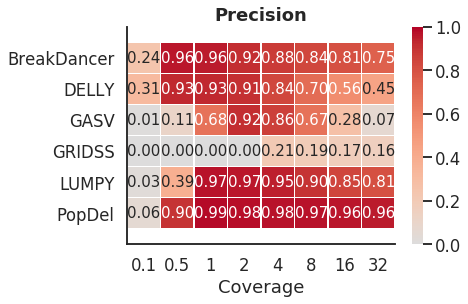

In [28]:
result = df_merge_mean.pivot(index='Tool', columns='cov', values='precision')
result = result[['0.1','0.5','1','2','4','8','16','32']]

import matplotlib.pyplot as plt
import seaborn as sns

fig3b=sns.set_style("white")
fig3b=sns.set_context("talk")
fig3b=sns.heatmap(result, annot=True, cmap='coolwarm',center=0,linewidths=.5,annot_kws={'size':15},fmt=".2f",vmin=0, vmax=1)
fig3b.set(xlabel='Coverage', ylabel='')
plt.title('Precision', weight='bold')
bottom, top = fig3b.get_ylim()
fig3b.set_ylim(bottom + 0.5, top - 0.5)

fig3b=sns.despine()
#plt.show(fig3b)
plt.savefig("../figures/fig4/Precision1.png",bbox_inches="tight")
plt.savefig("../figures/fig4/Precision1.pdf",bbox_inches="tight")

# Figure 4 (c)

In [29]:
# df_merge_mean

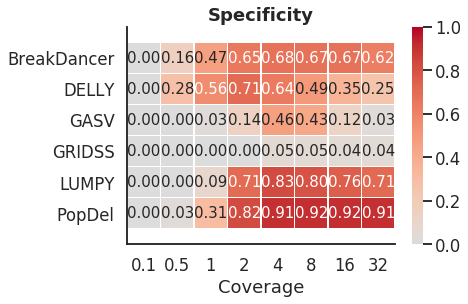

In [30]:
result = df_merge_mean.pivot(index='Tool', columns='cov', values='specificity')
result = result[['0.1','0.5','1','2','4','8','16','32']]

import matplotlib.pyplot as plt
import seaborn as sns

fig3c=sns.set_style("white")
fig3c=sns.set_context("talk")
fig3c=sns.heatmap(result, annot=True, cmap='coolwarm',center=0,linewidths=.5,annot_kws={'size':15},fmt=".2f",vmin=0, vmax=1)
fig3c.set(xlabel='Coverage', ylabel='')
plt.title('Specificity', weight='bold')
bottom, top = fig3c.get_ylim()
fig3c.set_ylim(bottom + 0.5, top - 0.5)

fig3c=sns.despine()
#plt.show(fig3c)
plt.savefig("../figures/fig4/Specificity1.png",bbox_inches="tight")
plt.savefig("../figures/fig4/Specificity1.pdf",bbox_inches="tight")

# Figure 4(d)

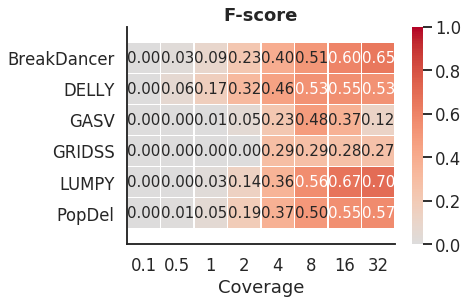

In [31]:
result = df_merge_mean.pivot(index='Tool', columns='cov', values='f-score')
result = result[['0.1','0.5','1','2','4','8','16','32']]

import matplotlib.pyplot as plt
import seaborn as sns

fig3d=sns.set_style("white")
fig3d=sns.set_context("talk")
fig3d=sns.heatmap(result, annot=True, cmap='coolwarm',center=0,linewidths=.5,annot_kws={'size':15},fmt=".2f",vmin=0, vmax=1)
fig3d.set(xlabel='Coverage', ylabel='')
plt.title('F-score', weight='bold')
bottom, top = fig3d.get_ylim()
fig3d.set_ylim(bottom + 0.5, top - 0.5)

fig3d=sns.despine()
# plt.show(fig3d)
plt.savefig("../figures/fig4/Fscore1.png",bbox_inches="tight")
plt.savefig("../figures/fig4/Fscore1.pdf",bbox_inches="tight")


In [32]:
df_merge.to_csv('../analysis_files/df_merge.csv',index=False)
df_sum.to_csv('../analysis_files/df_sum.csv',index=False)